In [1]:
from panda.methods import viz as viz
from panda import default_config
import numpy as np

#pipeline methods 
from panda.methods.misc import setup
from panda.methods.denoise import highpass 
from panda.methods.denoise import bandstop 
from panda.methods.denoise import wave_rejection
from panda.methods.denoise import eog_regress 
from panda.methods.denoise import amp_shrinkage 
from panda.methods.bad_chans import bad_detec
from panda.methods.interpolation import wave_interp

from numpy import genfromtxt
import cPickle as pkl 

In [2]:
eeg_datapath = '/home/student/Documents/sub-NDARAA075AMK_eeg.pkl'

with open(eeg_datapath, 'rb') as f:
    data = pkl.load(f)
with open('/home/student/Documents/chan_locs.pkl') as f:
    chan_locs = pkl.load(f)
    
p_global = default_config.params['p_global']
p_global['plot_folders']['heatmap_dir'] = ''
p_global['plot_folders']['sparkline_dir'] = ''
eog_chans = []
eeg_chans = np.setdiff1d(np.arange(111), eog_chans)
p_global.update({'eog_chans': eog_chans, 
                'eeg_chans': eeg_chans})
p_global['inter'].update({'chan_locs': chan_locs})
p_global['plotting']['notebook'] = True

In [3]:
(data, p_local) = setup(data, {'eog_in': True}, p_global)

In [4]:
(data, p_local) = highpass(data, p_local, p_global)
(data, p_local) = eog_regress(data, p_local, p_global)
(data, p_local) = wave_rejection(data, p_local, p_global)
(data, p_local) = amp_shrinkage(data, p_local, p_global)

In [5]:
(D_bd, p_local) = bad_detec(data, p_local, p_global)
D_bd[p_local['bad_chans'], :] = 0

Test
[ 0  7 13 19 23]
Here
Here


In [6]:
(D_int, p_local) = wave_interp(D_bd, p_local, p_global)

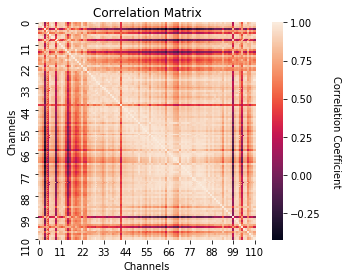

In [17]:
viz.correlation(D_int, p_local, p_global)